# Exploratory data analysis

## Imports

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

Lists that have been stored in CSV aren't automatically parsed by `pandas`. Thus this small function converts a string in the form `'{'banana', 'orange', 'tangerine'}'` in a Python list containing the same elements

In [2]:
def string_to_list(column):
    return [element.strip(" ") for element in column.strip("{}").replace("'", "").split(", ")]

Simply use `read_csv` to import the data. We ignore the first column since we do not need these repeating ids. We can then apply our `string_to_list` function to the list of hashtags

In [3]:
tiktoks = pd.read_csv("data/tiktoks.csv", usecols=range(1,8), parse_dates=["date"])
tiktoks.hashtags = tiktoks.hashtags.apply(string_to_list)
tiktoks.head(5)

,video_id,hashtags,date,user_id,n_likes,n_comments,n_shared
0,1837067303714442366,"[aussie, biden2020, bidenharris2020, straya]",2020-11-07 01:51:07,1192012069979362808,8300000,83600,238000
1,4899762877921143731,"[biden2020, election2020, foryou, viral, fürdi...",2020-11-06 18:11:03,738634680110129777,7200000,157500,536700
2,-3337063503762208334,"[foryoupage, biden2020, fyp, foryou]",2020-10-19 18:41:40,3802590914777843757,5000000,105700,400400
3,-8563026770357025091,"[biden2020, trumpsong, viral, parati, repost, ...",2020-06-16 22:41:10,-4673072110752922293,4900000,138500,355900
4,8160608468973820327,[biden2020],2020-10-31 23:04:55,-1858632524192455925,4600000,69500,217800


## Visualitions

We first create a list containing all the hashtags we used to collect the data.

Then we create the DataFrame `tiktoks_exploded` that contains one entry for each hashtags. This means that if a row had hashtags `['Biden2020', 'bidenharris2020']`, the exploded version will transform it in two distinct rows, each with a single hashtag

In [25]:
queried_hashtags = ["Biden2020", "Trump2020", "biden", "trump", "election2020", "2020election", "donaldtrump", "joebiden", "maga", "trumpout",
                    "democrat", "republican", "trumpvsbiden", "bidenvstrump", "voteblue", "votered"]
tiktoks_exploded = tiktoks.explode("hashtags")

Display the distribution of publications of each of the queried hashtags. Each bin represents a period of 10 days.

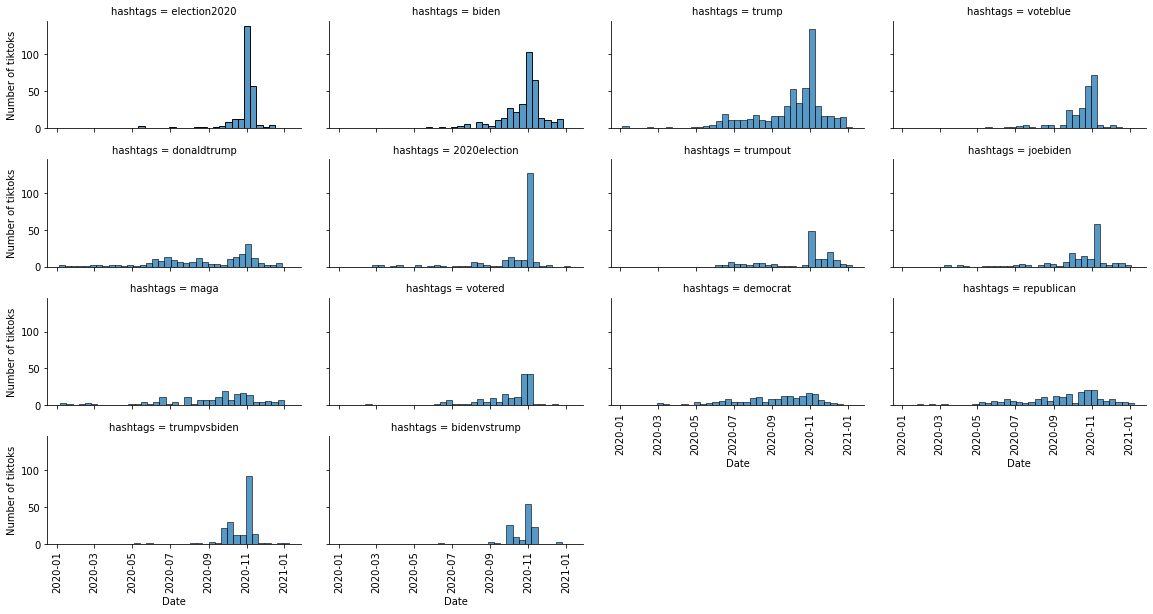

In [26]:
g = sns.FacetGrid(tiktoks_exploded.query("hashtags in @queried_hashtags"), col="hashtags", col_wrap = 4, sharex = True, sharey=True, height = 2, aspect=2)
g.map_dataframe(sns.histplot, x="date", binwidth=10)
g.set_axis_labels("Date", "Number of tiktoks")
g.set_xticklabels(rotation=90)

Display the top 20 most used hashtags in our dataset

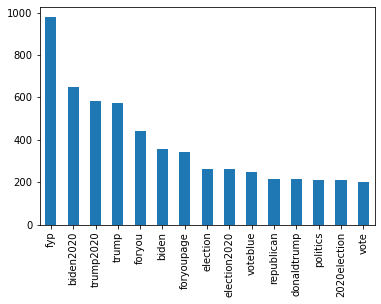

In [38]:
top_10 = tiktoks_exploded.hashtags.value_counts()[:15].plot(kind="bar")